# <font color = 'dark blue'> Investment Assignment </font>

Analyzing for Spark Funds, on global trends in investments so that they can take the investment decisions effectively.

The two minor constraints of spark funds,
-  Invest between **5 to 15 million** USD per round of investment
-  Invest only in **English-speaking countries** because of the ease of communication with the companies it would invest in

**Business objective:** The objective is to identify the best sectors, countries, and a suitable investment type for making investments.

Our goal was divided into three sub goals. 1) Investment type analysis, 2) Country analysis & 3) Sector analysis.
But first, let's start by importing data

### <font color = blue>Loading the companies and rounds data</font>

In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [1351]:
### Loading companies.csv file
companies = pd.read_csv("companies.csv")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [1353]:
### Loading rounds2.csv file
rounds2 = pd.read_csv("rounds2.csv")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


### <font color=blue>Data Understanding</font>

In [1354]:
rounds2.shape

(114949, 6)

In [1355]:
companies.shape

(66368, 10)

In [1356]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1357]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [1358]:
# checking column-wise null values
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [1359]:
# checking column-wise null values percentage
round(100*(rounds2.isnull().sum()/len(master_df.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        88.81
funded_at                  0.00
raised_amount_usd         21.18
dtype: float64

In [1360]:
# checking column-wise null values
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [1361]:
# checking column-wise null values percentage
round(100*(companies.isnull().sum()/len(master_df.index)),2)

permalink        0.00
name             0.00
homepage_url     5.36
category_list    3.34
status           0.00
country_code     7.37
state_code       9.06
region           8.51
city             8.51
founded_at      16.13
dtype: float64

### <font color=blue> Checkpoint 1: Data Cleaning</font>

We have null values in the following columns.<br>

**In Company DataFrame:**<br>
*name, homepage_url, category_list, country_code, state_code, region, city, founded_at.*<br>

**In rounds2 DataFrame:**<br>
*funding_round_code, raised_amount_usd*<br>
1. We have only one company without a `name`, so dropping it.
2. For our analysis, we don't need `homepage_url`. So removing the column itself.
3. Since we are going to focus on country later on, I am not going to either remove `state_code, region, city` or trying to impute them, since it won't make sense to impute with mode for these fields which cause incorrect info of the company. So just keeping them as it is.
4. For `Category_list and country code`, we can't drop any data. Again it won't make sense to impute a contry code with mode. And for category_list, I am going to focus them on category analysis. So keeping both of them as it is.
5. `founded_at` is useful only when we identify our final company which we decide to go with. So not going to spend time with it for now.
6. For our analysis, we don't need `funding_round_permalink`. So removing the column itself.
7. Again `funding_round_code` is useful when we decide on the company in the final stage. So, I am not going to worry about it for now.
8. `raised_amount_usd` is kind of our target variable. So obviously `dropping any rows will be risky`. And I am `not trying to impute` them by any way. Because,
- The null may mean that the company has not raised money at all. 
- And also Haven't imputed or removed the nulls and not removed outliers, Because In our data analysis, 
    - We are filtering data based on count of funding type
    - Filtering data by adding the investments across countries
    - Filtering data by counting investments across sectors.
- So if we remove, we may lose some data and go into different funding type & if we impute it may create a biased one across country or sectors. So not doing either of it and proceeding as it is.<br>

So lets perform the actions required`( 1, 2 & 6 only)`.


In [1362]:
# 1.We have only one company without a name and the status was closed, so it won't affect our analysis. so dropping it.
# let's check the shape before deleting.
companies.shape

(66368, 10)

In [1363]:
companies = companies[~ companies.name.isnull()]

In [1364]:
# Let's check shape once again
companies.shape

(66367, 10)

We have deleted one row which didn't have name of the comapany. 

In [1365]:
# 2.For our analysis, we don't need homepage_url. So removing the column itself.
companies = companies.drop(['homepage_url'],axis=1)
companies.head(3)

,permalink,name,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN


In [1366]:
# 6.For our analysis, we don't need funding_round_permalink. So removing the column itself.
rounds2 = rounds2.drop(['funding_round_permalink'],axis=1)
rounds2.head(3)

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,venture,A,14-10-2014,NaN
2,/organization/-qounter,seed,NaN,01-03-2014,700000.00


#### Merging two dataframes into one.

In [1367]:
# Let's convert both the permalink fields from the dataframes into smaller case to maintain data consistency.
companies.permalink = companies.permalink.str.lower()
rounds2.company_permalink = rounds2.company_permalink.str.lower()

In [1368]:
#Merging the two dfs - companies & rounds
master_df = pd.merge(companies,rounds2,how = "inner", left_on = "permalink", right_on = "company_permalink")
master_df.head()

,permalink,name,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,venture,A,19-03-2008,2000000.00


In [1369]:
#displaying % of each category
master_df.status.value_counts(normalize=True)*100

operating   78.43
acquired    10.22
closed       7.58
ipo          3.76
Name: status, dtype: float64

We can see that, there are some closed companies in the dataframe. Let's remove them in the final step when we decide the company. For now, let's keep as it is.

In [1370]:
#Removing reduntant column
master_df = master_df.drop(['company_permalink'],axis = 1)
master_df.head()

,permalink,name,category_list,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,venture,A,19-03-2008,2000000.00


Let's fill in our answers in Table 1.1.

### Table 1.1
Understand the Data Set 
#### Q1. How many unique companies are present in rounds2?

In [1371]:
# 66373 unique companies are there in rounds dataframe.
rounds2.company_permalink.nunique()

66373

#### Q2. How many unique companies are present in the companies file?

In [1372]:
# 66368 unique companies are there in companies dataframe.(I have removed the one without name)
companies.permalink.nunique()

66367

#### Q3. In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

`permalink` is the unique key for each of the company in companies dataframe

#### Q4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [1373]:
# We have 6 companies in rounds2 dataframe which are not in companies dataframe. So Yes.
len(rounds2.company_permalink.unique()) - len(companies.permalink.unique())

6

#### Q5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [1374]:
# We have 1,14,908 observations in the master_df
master_df.shape[0]

114908

### <font color=blue> Checkpoint 2: Funding Type Analysis </font> 
Since Spark Funds wants to choose one of these four investment type - `venture, angel, seed, and private equity`
Let's filter our data accordingly.

In [1375]:
# filtering as funding_round_type = venture, angel, seed, and private equity.
master_df = master_df[master_df.funding_round_type.isin(['venture','seed','angel','private_equity'])]

In [1376]:
# Let's cross check once.
master_df.funding_round_type.value_counts()

venture           55487
seed              30503
angel              6092
private_equity     2285
Name: funding_round_type, dtype: int64

In [1377]:
# It was 114908, now it is 94367
master_df.shape

(94367, 13)

Let's see the distribution of investments across funding type by mean and median.

In [1378]:
pd.options.display.float_format= '{:.2f}'.format
master_df.pivot_table(values='raised_amount_usd', index='funding_round_type', aggfunc=('mean','median'))

,mean,median
funding_round_type,,
angel,958891.77,400000.00
private_equity,73308593.03,20000000.00
seed,719833.20,275000.00
venture,11748701.57,5000000.00


Since `Mean` will  be affected by outliers, Let's take `median` as our representative value of investments for each funding types.

As we want to invest between 5 to 15 million USD. Median for `venture is 5M`. For others it was either below 5M or above 15M. So I am going with `venture`.

In [1379]:
# before filtering
master_df.funding_round_type.value_counts()

venture           55487
seed              30503
angel              6092
private_equity     2285
Name: funding_round_type, dtype: int64

In [1380]:
# Filtering the data so it only contains the 'venture' funding type.
main_FT_df = master_df[master_df.funding_round_type == 'venture']

In [1381]:
# after filtering
main_FT_df.funding_round_type.value_counts()

venture    55487
Name: funding_round_type, dtype: int64

Let's fill in our answers in Table 2.1.

### Table 2.1
Representative Values of Investments for Each of these Funding Types

I am considering `Median` as our representative value, Since it `won't affect by outliers`. Eventhough we removed most of the outliers, Let's not risk and just go with `Median`.

<font color=green> Let's use the pivot table used before and answer the following questions.</font>

#### 1. Representative funding amount of venture type?

`5000000.00`

#### 2. Representative funding amount of angel type?

`400000.00`

#### 3. Representative funding amount of seed type?

`275000.00`

#### 4. Representative funding amount of private equity type?

`20000000.00`

#### 5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

`venture` investment type is more suitable for Spark Funds. Since the reprentative funding amount. i.e. Median for `venture is 5M`.

### <font color=blue> Checkpoint 3: Country Analysis </font>
Spark Funds wants to see the top nine countries which have received the highest total funding.
1. For the chosen investment type, make a data frame named `top9 with the top nine countries` (based on the `total investment amount each country` has received)
2. Identify the `top three English-speaking` countries in the data frame top9.

In [1382]:
# Taking country-wise, total investment amount & getting top 9 of them.
country_wise_investment = main_FT_df.pivot_table(values='raised_amount_usd', index='country_code', aggfunc=('sum')).sort_values(by='raised_amount_usd', ascending=False)[0:9]
country_wise_investment

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


In [1383]:
# Creating top9 dataframe with the top nine countries which has highest total investment.
top9 = main_FT_df[main_FT_df.country_code.isin(country_wise_investment.index)]

In [1384]:
# The nine countries are,
top9.country_code.unique()

array(['IND', 'USA', 'CHN', 'CAN', 'GBR', 'FRA', 'JPN', 'DEU', 'ISR'],
      dtype=object)

We have top 9 countries now, let's find wheater they are english speaking country or not.<br>
For our analysis, considering a country to be English speaking only if English is one of the official languages in that country. With the wiki link given to us. I have created a dataframe wheater the country is English speaking country or not.

In [1385]:
# English speaking countries
countries = pd.DataFrame({'country': ['United States','United Kingdom','Canada','China','Israel','India','Germany','Japan','France'],
                          'country_code':['USA', 'GBR', 'CAN', 'CHN', 'ISR', 'IND', 'DEU', 'JPN', 'FRA'],
                          'English_Speaking_Ind':['Yes','Yes','Yes','No','No','No','No','No','No']})

In [1386]:
countries

,country,country_code,English_Speaking_Ind
0,United States,USA,Yes
1,United Kingdom,GBR,Yes
2,Canada,CAN,Yes
3,China,CHN,No
4,Israel,ISR,No
5,India,IND,No
6,Germany,DEU,No
7,Japan,JPN,No
8,France,FRA,No


We have only three countries speaking english. And with the above `country_wise_investment pivot table`, Now we clearly have the top 3 countries which speaks english. They are: `USA, GBR and CAN`

In [1387]:
# top three English-speaking countries in the data frame top9
top3 = top9[top9.country_code.isin(['USA','GBR','CAN'])]

In [1388]:
# Let's check once,
top3.country_code.value_counts()

USA    38372
GBR     2303
CAN     1346
Name: country_code, dtype: int64

Let's fill in our answers in Table 3.1

### Table 3.1
Analysing the Top 3 English-Speaking Countries.<br>

<font color=green> Answering the following questions with the help of country_wise_investment pivot table and top3 dataframe.</font>
#### Q1. Top English speaking country?

`United States(USA)`

#### Q2. Second English speaking country?

`United Kingdom(GBR)`

#### Q3. Third English speaking country?

`Canada(CAN)`

### <font color=blue> Checkpoint 4: Sector Analysis 1 </font>
1. Extract the `primary sector` of each category list from the `category_list` column.
    - As I discussed with the CEO, come up with the business rule that the `first string` before the `vertical bar` will be considered the `primary sector`.
2. Using the mapping file `'mapping.csv'` to map each `primary sector` to one of the `eight main sectors` (Note: `‘Others’` is also considered one of the main sectors)

In [1389]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42021 entries, 1 to 114897
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           42021 non-null  object 
 1   name                42021 non-null  object 
 2   category_list       41630 non-null  object 
 3   status              42021 non-null  object 
 4   country_code        42021 non-null  object 
 5   state_code          41942 non-null  object 
 6   region              41848 non-null  object 
 7   city                41848 non-null  object 
 8   founded_at          34936 non-null  object 
 9   funding_round_type  42021 non-null  object 
 10  funding_round_code  22640 non-null  object 
 11  funded_at           42021 non-null  object 
 12  raised_amount_usd   39450 non-null  float64
dtypes: float64(1), object(12)
memory usage: 4.5+ MB


Firstly dropping the category_list which has null values. Since, we take NaNs with `'blanks' main sector` which we drop anyway. So dropping here itself.

In [1391]:
top3 = top3[~top3.category_list.isnull()]

In [1392]:
# Let's check the shape once.
top3.shape

(41630, 13)

In [1393]:
# Before extracting,
top3.category_list

1         Application Platforms|Real Time|Social Network...
5                                                  Software
8                                             Biotechnology
10                                                Analytics
11                                                Analytics
                                ...                        
114881                                        Biotechnology
114883                                        Biotechnology
114884                                        Biotechnology
114895                                           E-Commerce
114897                                        Biotechnology
Name: category_list, Length: 41630, dtype: object

In [1394]:
# 1.Extract the primary sector i.e. first string before the vertical bar, of each category list from the category_list column
top3.category_list = top3.category_list.apply(lambda x: str(x).split("|")[0])

In [1395]:
# After extracting,
top3.category_list

1         Application Platforms
5                      Software
8                 Biotechnology
10                    Analytics
11                    Analytics
                  ...          
114881            Biotechnology
114883            Biotechnology
114884            Biotechnology
114895               E-Commerce
114897            Biotechnology
Name: category_list, Length: 41630, dtype: object

In [1396]:
# 2.Using the mapping file 'mapping.csv'
mapping = pd.read_csv("mapping.csv")

In [1397]:
# Before dropping Blanks column
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [1398]:
# After dropping Blanks column
mapping = mapping.drop(['Blanks'],axis = 1)
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [1399]:
# storing the value and id variables in two separate arrays 

#storing the value variables in one series
val_vars = list(mapping.columns[1:])

#storing the id variables in one series using setdiff()
id_vars = list(np.setdiff1d(mapping.columns,val_vars))

print(val_vars)
print(id_vars)

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']
['category_list']


In [1400]:
# convert into long
mapping = pd.melt(mapping, id_vars=id_vars, value_vars=val_vars)
mapping

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
5499,Wholesale,"Social, Finance, Analytics, Advertising",0
5500,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5501,Wireless,"Social, Finance, Analytics, Advertising",0
5502,Women,"Social, Finance, Analytics, Advertising",0


In [1401]:
# Removing rows having zero
mapping = mapping[mapping.value==1]

# Removing Values column
mapping = mapping.drop('value',axis=1)

In [1402]:
mapping

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising"
5434,Social Television,"Social, Finance, Analytics, Advertising"
5435,Social Travel,"Social, Finance, Analytics, Advertising"
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [1403]:
#Renaming the 'variable' column
mapping = mapping.rename(columns={'variable':'main_sector'})
mapping

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising"
5434,Social Television,"Social, Finance, Analytics, Advertising"
5435,Social Travel,"Social, Finance, Analytics, Advertising"
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [1404]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41630 entries, 1 to 114897
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           41630 non-null  object 
 1   name                41630 non-null  object 
 2   category_list       41630 non-null  object 
 3   status              41630 non-null  object 
 4   country_code        41630 non-null  object 
 5   state_code          41552 non-null  object 
 6   region              41460 non-null  object 
 7   city                41460 non-null  object 
 8   founded_at          34813 non-null  object 
 9   funding_round_type  41630 non-null  object 
 10  funding_round_code  22481 non-null  object 
 11  funded_at           41630 non-null  object 
 12  raised_amount_usd   39230 non-null  float64
dtypes: float64(1), object(12)
memory usage: 4.4+ MB


In [1405]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 5479
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [1406]:
# Let's convert both the category_list fields from the dataframes into smaller case before merging to maintain data consistency.
top3.category_list = top3.category_list.str.lower()
mapping.category_list = mapping.category_list.str.lower()

In [1407]:
# Merging the two dfs - top3 & mapping
# Using equi join, since we don't need any categories not falling under the eight main sectors.
Final_df = pd.merge(top3,mapping,how = "inner", on = "category_list")
Final_df.head()

,permalink,name,category_list,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
0,/organization/-qounter,:Qounter,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,venture,A,14-10-2014,NaN,"News, Search and Messaging"
1,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,NaN,01-08-2001,NaN,"News, Search and Messaging"
2,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,NaN,29-08-2003,6000000.00,"News, Search and Messaging"
3,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,B,06-12-2002,8000000.00,"News, Search and Messaging"
4,/organization/allegro-networks,Allegro Networks,application platforms,closed,USA,CA,SF Bay Area,San Jose,01-01-2000,venture,B,04-02-2002,60000000.00,"News, Search and Messaging"


In [1408]:
# Before renaming category_list column
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38797 entries, 0 to 38796
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           38797 non-null  object 
 1   name                38797 non-null  object 
 2   category_list       38797 non-null  object 
 3   status              38797 non-null  object 
 4   country_code        38797 non-null  object 
 5   state_code          38720 non-null  object 
 6   region              38629 non-null  object 
 7   city                38629 non-null  object 
 8   founded_at          32301 non-null  object 
 9   funding_round_type  38797 non-null  object 
 10  funding_round_code  20721 non-null  object 
 11  funded_at           38797 non-null  object 
 12  raised_amount_usd   36618 non-null  float64
 13  main_sector         38797 non-null  object 
dtypes: float64(1), object(13)
memory usage: 4.4+ MB


In [1409]:
# Renaming category_list as primary_sector
Final_df = Final_df.rename(columns={"category_list" : "primary_sector"})
Final_df.head()

,permalink,name,primary_sector,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
0,/organization/-qounter,:Qounter,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,venture,A,14-10-2014,NaN,"News, Search and Messaging"
1,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,NaN,01-08-2001,NaN,"News, Search and Messaging"
2,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,NaN,29-08-2003,6000000.00,"News, Search and Messaging"
3,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,B,06-12-2002,8000000.00,"News, Search and Messaging"
4,/organization/allegro-networks,Allegro Networks,application platforms,closed,USA,CA,SF Bay Area,San Jose,01-01-2000,venture,B,04-02-2002,60000000.00,"News, Search and Messaging"


In [1410]:
# After renaming
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38797 entries, 0 to 38796
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           38797 non-null  object 
 1   name                38797 non-null  object 
 2   primary_sector      38797 non-null  object 
 3   status              38797 non-null  object 
 4   country_code        38797 non-null  object 
 5   state_code          38720 non-null  object 
 6   region              38629 non-null  object 
 7   city                38629 non-null  object 
 8   founded_at          32301 non-null  object 
 9   funding_round_type  38797 non-null  object 
 10  funding_round_code  20721 non-null  object 
 11  funded_at           38797 non-null  object 
 12  raised_amount_usd   36618 non-null  float64
 13  main_sector         38797 non-null  object 
dtypes: float64(1), object(13)
memory usage: 4.4+ MB


### <font color=blue> Checkpoint 5: Sector Analysis 2 </font>
Creating three separate dataframes D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.<br>
Based on the analysis of the sectors, Finalizing on which main sectors and countries we should invest in<br>
- D1 - Country C1 - USA
- D2 - Country C2 - GBR
- D3 - Country C3 - CAN
- FT - Funding Type - venture

#### Now we have two conditions for this Final_df to satisfy before spliting them by countries.
1. Need to have one specific funding type 'FT' falling within the 5-15 million USD range.
2. Need to have only three countries which speaking english

In [1411]:
### Let's check one by one - 1. Need to have one specific funding type 'FT'
Final_df.funding_round_type.value_counts()

venture    38797
Name: funding_round_type, dtype: int64

In [1412]:
### 2. Need to have only three countries which speaking english
Final_df.country_code.value_counts()

USA    35421
GBR     2120
CAN     1256
Name: country_code, dtype: int64

`Removing` companies with `closed status`, since we don't need the closed companies in our analysis anymore. Since we are kind of finalizing the sector and company with top 3 countries, keeping the closed one may lead to wrong conclusion. 


In [1413]:
Final_df = Final_df[Final_df.status != 'closed']
Final_df.shape

(36200, 14)

Let's remove raised_amount_usd with `zero` values. Since we don't need that to be counted in the final results.

In [1415]:
Final_df = Final_df[~(Final_df.raised_amount_usd == 0)]

In [1416]:
# Shape before spliting
Final_df.shape

(36184, 14)

In [1417]:
# Creating three separate dataframes for each countries.
D1_USA = Final_df[Final_df.country_code == 'USA']
D2_GBR = Final_df[Final_df.country_code == 'GBR']
D3_CAN = Final_df[Final_df.country_code == 'CAN']

In [1418]:
# Shape after spliting
D1_USA.shape[0]+D2_GBR.shape[0]+D3_CAN.shape[0]

36184

In [1419]:
D1_USA.head(10)

,permalink,name,primary_sector,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
0,/organization/-qounter,:Qounter,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,venture,A,14-10-2014,NaN,"News, Search and Messaging"
1,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,NaN,01-08-2001,NaN,"News, Search and Messaging"
2,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,NaN,29-08-2003,6000000.00,"News, Search and Messaging"
3,/organization/aarohi-communication,Aarohi communication,application platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,venture,B,06-12-2002,8000000.00,"News, Search and Messaging"
6,/organization/appian,Appian,application platforms,operating,USA,VA,"Washington, D.C.",Reston,17-08-1999,venture,NaN,03-03-2014,37499994.00,"News, Search and Messaging"
7,/organization/appian,Appian,application platforms,operating,USA,VA,"Washington, D.C.",Reston,17-08-1999,venture,A,21-07-2008,10000000.00,"News, Search and Messaging"
8,/organization/appilog,Appilog,application platforms,acquired,USA,NY,New York City,New York,NaN,venture,B,15-01-2004,9000000.00,"News, Search and Messaging"
9,/organization/appilog,Appilog,application platforms,acquired,USA,NY,New York City,New York,NaN,venture,NaN,24-06-2003,6500000.00,"News, Search and Messaging"
10,/organization/bad-donkey-social,BDS Mobile,application platforms,operating,USA,WI,Madison,Madison,06-10-2011,venture,A,11-09-2014,1000000.00,"News, Search and Messaging"
12,/organization/bonsai-ai,Bonsai AI,application platforms,operating,USA,CA,SF Bay Area,Berkeley,18-02-2014,venture,A,03-04-2015,2200000.00,"News, Search and Messaging"


In [1420]:
D2_GBR

,permalink,name,primary_sector,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
18,/organization/common-interest-communities,Common Interest Communities,application platforms,operating,GBR,H9,London,London,NaN,venture,NaN,09-07-2014,10000000.00,"News, Search and Messaging"
24,/organization/geospock-ltd-,GeoSpock Ltd.,application platforms,operating,GBR,C3,London,Cambridge,01-01-2013,venture,NaN,01-10-2014,5460000.00,"News, Search and Messaging"
25,/organization/geospock-ltd-,GeoSpock Ltd.,application platforms,operating,GBR,C3,London,Cambridge,01-01-2013,venture,A,05-10-2015,5400000.00,"News, Search and Messaging"
31,/organization/lemonade-3,Takumi,application platforms,operating,GBR,H9,London,London,01-06-2015,venture,NaN,01-04-2015,NaN,"News, Search and Messaging"
52,/organization/tao-group-2,Tao Group,application platforms,operating,GBR,K7,London,Reading,01-01-1992,venture,NaN,06-05-2004,7000000.00,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38757,/organization/skin-analytics,Skin Analytics,mhealth,operating,GBR,C3,London,Cambridge,01-05-2012,venture,NaN,09-07-2014,100000.00,Health
38758,/organization/skinkers,Skinkers,peer-to-peer,acquired,GBR,H9,London,London,01-01-1999,venture,B,01-10-2007,16000000.00,"News, Search and Messaging"
38759,/organization/skinkers,Skinkers,peer-to-peer,acquired,GBR,H9,London,London,01-01-1999,venture,NaN,29-01-2007,3914268.00,"News, Search and Messaging"
38766,/organization/thoughtbubble-productions,Thoughtbubble Productions,web design,operating,GBR,H9,London,London,NaN,venture,A,16-01-2001,4000000.00,"News, Search and Messaging"


In [1421]:
D3_CAN

,permalink,name,primary_sector,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
34,/organization/mmb-networks,MMB Networks,application platforms,operating,CAN,ON,Toronto,Toronto,01-01-2008,venture,A,01-12-2013,3000000.00,"News, Search and Messaging"
73,/organization/2catalyze,2Catalyze,software,operating,CAN,ON,Toronto,Toronto,01-01-2008,venture,NaN,25-08-2010,6785876.00,Others
74,/organization/360incentives-com,360incentives.com,software,operating,CAN,ON,Toronto,Whitby,01-01-2008,venture,NaN,15-01-2013,7650000.00,Others
163,/organization/agora-mobile,Agora Mobile,software,operating,CAN,ON,Moncton,Moncton,01-01-2009,venture,NaN,31-03-2014,1000000.00,Others
164,/organization/aimetis,Aimetis,software,operating,CAN,ON,Toronto,Waterloo,01-01-2001,venture,A,04-03-2010,5000000.00,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38711,/organization/rewardloop,RewardLoop,incentives,operating,CAN,BC,Vancouver,Vancouver,15-05-2010,venture,A,09-05-2012,1000000.00,"Social, Finance, Analytics, Advertising"
38712,/organization/rewardloop,RewardLoop,incentives,operating,CAN,BC,Vancouver,Vancouver,15-05-2010,venture,NaN,27-05-2011,250000.00,"Social, Finance, Analytics, Advertising"
38738,/organization/sava-transmedia,Sava Transmedia,social games,operating,CAN,QC,Montreal,Montréal,01-05-2011,venture,A,28-04-2011,3152231.00,"Social, Finance, Analytics, Advertising"
38760,/organization/smart-ecosystems,Smart Ecosystems,virtual workforces,operating,CAN,AB,Calgary,Calgary,01-01-1987,venture,NaN,11-03-2014,NaN,Entertainment


### Table 5.1 sector-wise Investment Analysis

#### 1. Total number of investments (count)

In [1422]:
# USA
D1_USA.raised_amount_usd.count()

31272

In [1423]:
# GBR
D2_GBR.raised_amount_usd.count()

1783

In [1424]:
# CAN
D3_CAN.raised_amount_usd.count()

1081

####  2. Total amount of investment (USD)

In [1425]:
# USA
D1_USA.raised_amount_usd.sum()

371038978034.0

In [1426]:
# GBR
D2_GBR.raised_amount_usd.sum()

17125001082.0

In [1427]:
# CAN
D3_CAN.raised_amount_usd.sum()

8005745380.0

In [1428]:
# USA - Getting sector-wise investment count and sorting in descending
sector_wise_count_USA = D1_USA.groupby('main_sector').raised_amount_usd.count().sort_values(ascending = False)
sector_wise_count_USA

main_sector
Others                                     7703
Cleantech / Semiconductors                 7374
Social, Finance, Analytics, Advertising    4843
News, Search and Messaging                 3936
Health                                     3072
Manufacturing                              2287
Entertainment                              1579
Automotive & Sports                         478
Name: raised_amount_usd, dtype: int64

In [1429]:
# GBR - Getting sector-wise investment count and sorting in descending
sector_wise_count_GBR = D2_GBR.groupby('main_sector').raised_amount_usd.count().sort_values(ascending = False)
sector_wise_count_GBR

main_sector
Others                                     476
Cleantech / Semiconductors                 400
Social, Finance, Analytics, Advertising    297
News, Search and Messaging                 222
Entertainment                              121
Manufacturing                              115
Health                                     111
Automotive & Sports                         41
Name: raised_amount_usd, dtype: int64

In [1430]:
# CAN - Getting sector-wise investment count and sorting in descending
sector_wise_count_CAN = D3_CAN.groupby('main_sector').raised_amount_usd.count().sort_values(ascending = False)
sector_wise_count_CAN

main_sector
Cleantech / Semiconductors                 297
Others                                     296
Social, Finance, Analytics, Advertising    151
News, Search and Messaging                 123
Manufacturing                               96
Health                                      57
Entertainment                               47
Automotive & Sports                         14
Name: raised_amount_usd, dtype: int64

With these three, answering the following six questions.

####  3. Top sector (based on count of investments)

In [1431]:
# Top sector - USA
sector_wise_count_USA.index[0]

'Others'

In [1432]:
# Top sector - GBR
sector_wise_count_GBR.index[0]

'Others'

In [1433]:
# Top sector - CAN
sector_wise_count_CAN.index[0]

'Cleantech / Semiconductors'

####   4. Second-best sector (based on count of investments)

In [1434]:
# USA
sector_wise_count_USA.index[1]

'Cleantech / Semiconductors'

In [1435]:
# GBR
sector_wise_count_GBR.index[1]

'Cleantech / Semiconductors'

In [1436]:
# CAN
sector_wise_count_CAN.index[1]

'Others'

####  5. Third-best sector (based on count of investments)

In [1437]:
# USA
sector_wise_count_USA.index[2]

'Social, Finance, Analytics, Advertising'

In [1438]:
# GBR
sector_wise_count_GBR.index[2]

'Social, Finance, Analytics, Advertising'

In [1439]:
# CAN
sector_wise_count_CAN.index[2]

'Social, Finance, Analytics, Advertising'

#### 6. Number of investments in the top sector (refer to point 3)

In [1440]:
# USA
sector_wise_count_USA[0]

7703

In [1441]:
# GBR
sector_wise_count_GBR[0]

476

In [1442]:
# CAN
sector_wise_count_CAN[0]

297

#### 7. Number of investments in the second-best sector (refer to point 4)

In [1443]:
# USA
sector_wise_count_USA[1]

7374

In [1444]:
# GBR
sector_wise_count_GBR[1]

400

In [1445]:
# CAN
sector_wise_count_CAN[1]

296

####  8. Number of investments in the third-best sector (refer to point 5)

In [1446]:
# USA
sector_wise_count_USA[2]

4843

In [1447]:
# GBR
sector_wise_count_GBR[2]

297

In [1448]:
# CAN
sector_wise_count_CAN[2]

151

Let's define a function `country_wise_investment`to find the country-wise, highest investment received company for Top Two Sectors with the help of already created sector-wise count.<br>
**Note:** Creating this function to answer question `9 and 10`.

In [1449]:
def country_wise_investment(country_name,postn_of_invt):
    if country_name.upper() == 'USA':
        if postn_of_invt <= sector_wise_count_USA.count():
            invt_position_val = D1_USA[D1_USA.main_sector == sector_wise_count_USA.index[postn_of_invt]].raised_amount_usd.max()
            resultant_company = D1_USA[(D1_USA.raised_amount_usd == invt_position_val) & (D1_USA.main_sector == sector_wise_count_USA.index[postn_of_invt])].name
            return resultant_company
        else:
            return '"position of investment" out of range'
    
    elif country_name.upper() == 'GBR':
        if postn_of_invt <= sector_wise_count_GBR.count():
            invt_position_val = D2_GBR[D2_GBR.main_sector == sector_wise_count_GBR.index[postn_of_invt]].raised_amount_usd.max()
            resultant_company = D2_GBR[(D2_GBR.raised_amount_usd == invt_position_val) & (D2_GBR.main_sector == sector_wise_count_GBR.index[postn_of_invt])].name
            return resultant_company
        else:
            return '"position of investment" out of range'
    elif country_name.upper() == 'CAN':
        if postn_of_invt <= sector_wise_count_CAN.count():
            invt_position_val = D3_CAN[D3_CAN.main_sector == sector_wise_count_CAN.index[postn_of_invt]].raised_amount_usd.max()
            resultant_company = D3_CAN[(D3_CAN.raised_amount_usd == invt_position_val) & (D3_CAN.main_sector == sector_wise_count_CAN.index[postn_of_invt])].name
            return resultant_company
        else:
            return '"position of investment" out of range'
    else:
        return 'Country is not in the top3'



#### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [1450]:
# USA
country_wise_investment('USA',0)

10464    SoFi
Name: name, dtype: object

In [1451]:
# GBR
country_wise_investment('GBR',0)

34911    OneWeb
Name: name, dtype: object

In [1452]:
# CAN
country_wise_investment('CAN',0)

18749    Ram Power
Name: name, dtype: object

#### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [1453]:
# USA
country_wise_investment('USA',1)

30818    Freescale Semiconductor
Name: name, dtype: object

In [1454]:
# GBR
country_wise_investment('GBR',1)

6641    Immunocore
Name: name, dtype: object

In [1455]:
# CAN
country_wise_investment('CAN',1)

23977    D2L
Name: name, dtype: object

### <font color=blue> Checkpoint 6: Plots </font>
As a final step, let's present our findings to the CEO of Spark Funds. Specifically, the three following plots:
#### 1. A plot showing the `representative amount of investment` in each funding type.
- For this, I am going to use `bar plot`.
- representative amount = `Median`.
- funding types = `venture,angel,private equity and seed`.

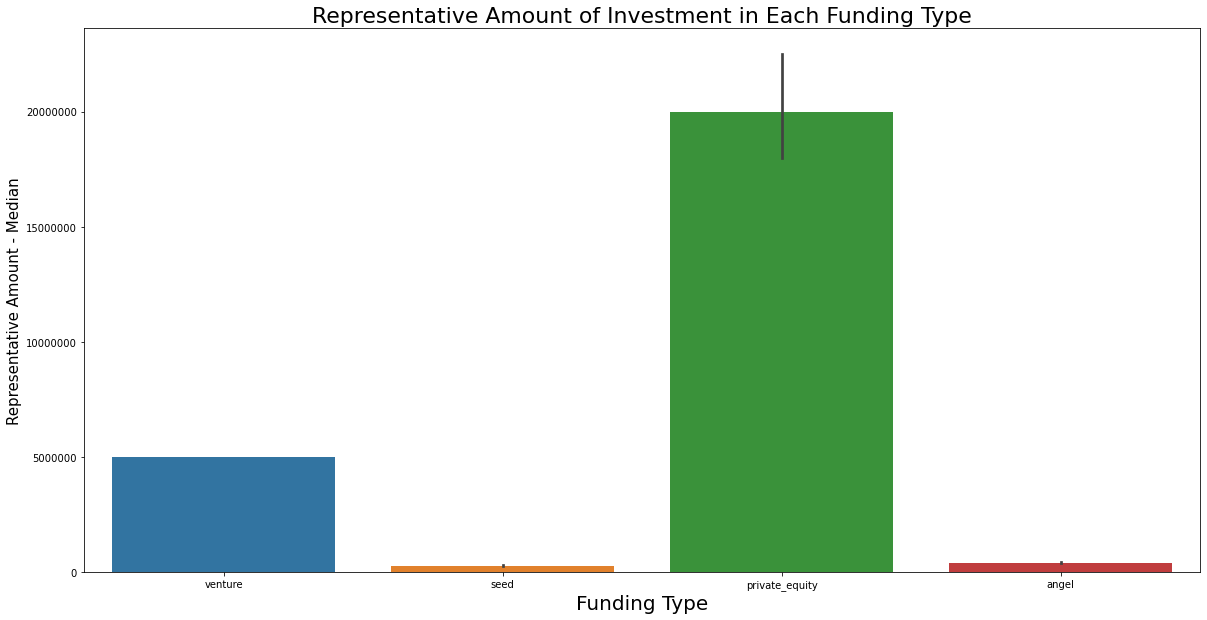

In [1456]:
# ploting for the representative amount of investment in each funding type.
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain')

# Plotting
sns.barplot(data= master_df, x="funding_round_type",y="raised_amount_usd",estimator=np.median)

# Naming x-axis, y-axis and Title
plt.xlabel("Funding Type", size=20)
plt.ylabel("Representative Amount - Median", size=15)
plt.title("Representative Amount of Investment in Each Funding Type", size=22)

plt.show()

As the range of funding preferred by Spark Funds is `5 to 15 million USD`. From the plot, we can see that `median` for `venture` is `5M`, And all the others are <5M or >15M. So I have choosen `venture` as our target funding type and processed with it.

#### 2. A plot showing the `top 9 countries` against the `total amount of investments` of funding type `FT`. This should make the `top 3 countries` (Country 1, Country 2, and Country 3) very clear.<br>
- I am using `barplot` again.
- Funding Type FT = `Venture`
- WIth top 9 countries
- Adding the English Speaking Country Indicator

Adding the English Speaking Indicator to `top9` dataframe with the help of `country` dataframe I created.

In [1457]:
top9_plot = pd.merge(top9,countries,how = "inner", on = "country_code")

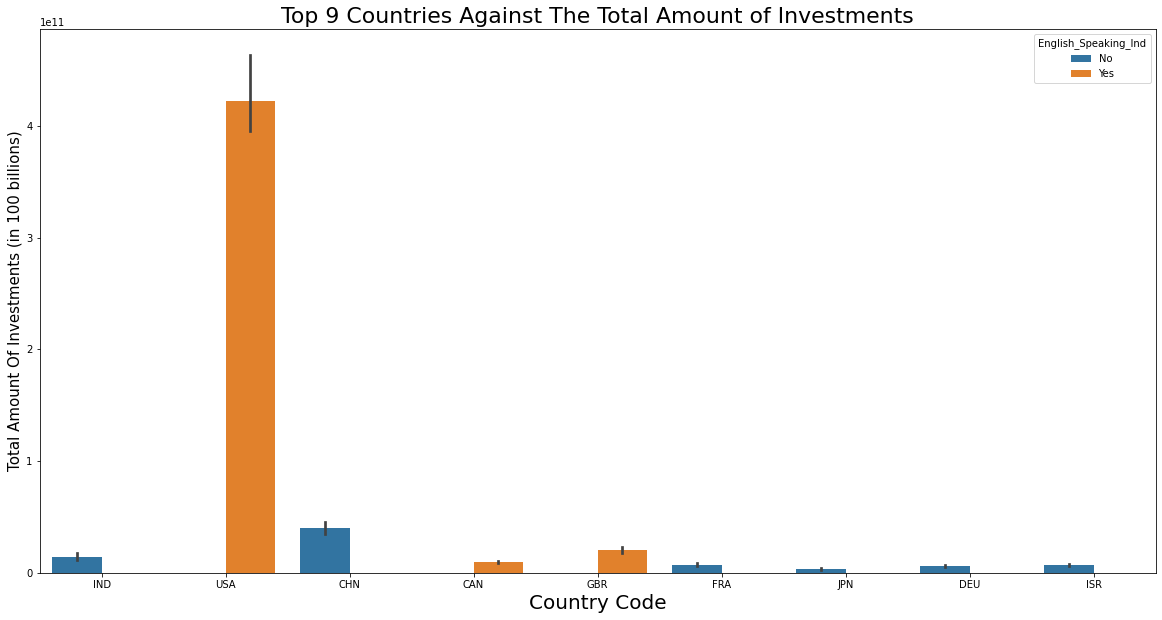

In [1458]:
# ploting for the total amount of investments in each of the 9 countries.
plt.figure(figsize=(20,10))

# Plotting
sns.barplot(data= top9_plot, x="country_code",y="raised_amount_usd",hue='English_Speaking_Ind',estimator=np.sum)

# Naming x-axis, y-axis and Title
plt.xlabel("Country Code", size=20)
plt.ylabel("Total Amount Of Investments (in 100 billions)", size=15)
plt.title("Top 9 Countries Against The Total Amount of Investments", size=22)

plt.show()

From the above barplot, we can clearly see that `USA is dominating`, `CHN comes second` but since it was not a english speaking country, `GBR takes the second place`. And the only english speaking country remaining is CAN, So `CAN` takes `third place`.
- First  - USA (United States),
- Second - GBR (United Kingdom),
- Third  - CAN (Canada)

#### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).<br>
- I am using `stacked barplot`.
- Funding Type FT = `Venture`
- top 3 countries = `USA, GBR, CAN`.

With the help of previous observations, I am creating a dataframe with top 3 sectors of the top 3 countries. And we know that the three sectors are same for all the three countries


In [1459]:
# Since all three cuntries have same three sectors, using USA's top three and filtering the dataframe.
Final_df_plot = Final_df[Final_df.main_sector.isin(sector_wise_count_USA.index[0:3])]

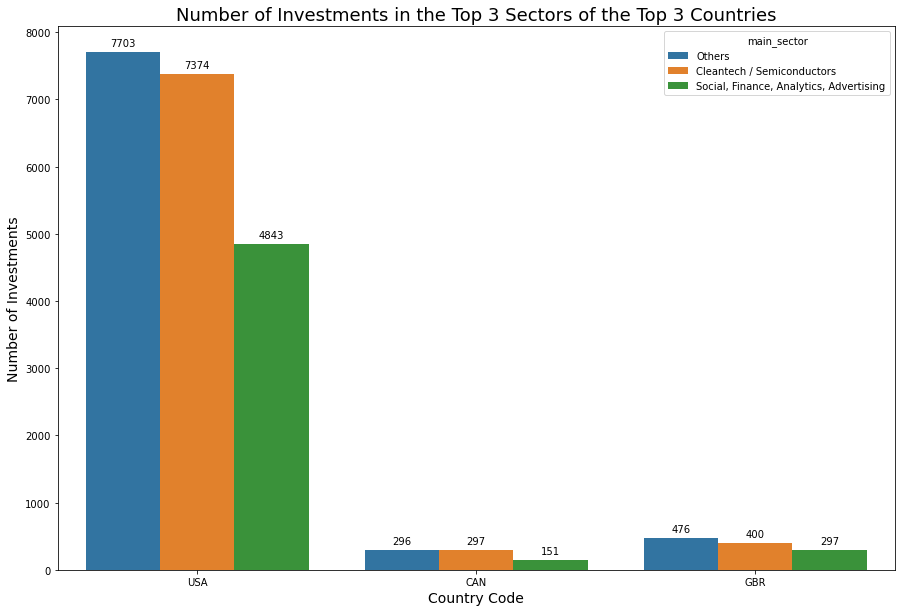

In [1460]:
# code for annotated barplot
plt.figure(figsize=(15, 10))
splot = sns.barplot(x="country_code", y="raised_amount_usd", hue="main_sector",
                    data=Final_df_plot,estimator=np.count_nonzero)
  
plt.xlabel("Country Code", size=14)
plt.ylabel("Number of Investments", size=14)
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries", size=18)

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.show()

From the plot, we can clearly see the number of investments in the top 3 sectors of the top 3 countries as mentioned below.
- USA 
    1. Others - 7703 
    2. Cleantech / Semiconductors - 7374
    3. Social, Finance, Analytics, Advertising - 4843
<br>
- CAN
    1. Cleantech / Semiconductors - 297
    2. Others - 296
    3. Social, Finance, Analytics, Advertising - 151
<br>
- GBR
    1. Others - 476
    2. Cleantech / Semiconductors - 400
    3. Social, Finance, Analytics, Advertising - 297

### Conclusions:
- Funding Type falling within the 5-15 million USD range – Venture (based on representative value: Median).
- Top Three English Speaking Most Invested Countries:
    1. First - USA, 
    2. Second - GBR, 
    3. Third - CAN
   
   <br>
    
- Top Three Sectors of the Top Three Countries: All the three countries have the same three sectors as most invested among them. Given a table of, Number of investments:
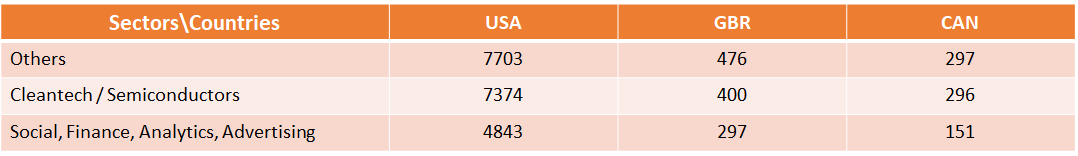

- Highest Investment Received Company for Top Two Sectors.
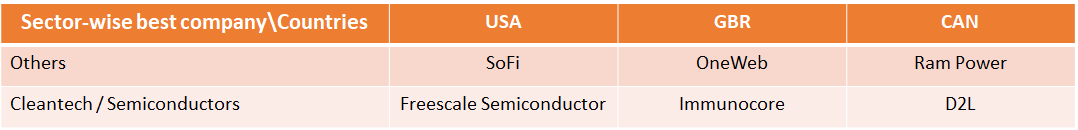

### With this I am completing my analysis. Hope from this, You would have found the right strategy to investment in. Thank You :)